***Introduction***
1. https://github.com/huggingface/diffusers
 일단 기본이 되는 diffuser 설치 및 관련 부분되는지 체크

2. 그 안에 있는 https://github.com/huggingface/diffusers/tree/main/examples/instruct_pix2pix



- 참고 : orgin: https://github.com/timothybrooks/instruct-pix2pix
- L4정도에서도 가능은 해보임
- 일단 기존 batch 정도에서는 18G 정도, GPU를 사용을 하기에...





## 초기 세팅

In [ ]:
!pip install --upgrade diffusers[torch]

In [ ]:
!pip install --upgrade diffusers[flax]

In [ ]:
from diffusers import DiffusionPipeline
import torch

# pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
# pipeline.to("cuda")
# pipeline("An image of a squirrel in Picasso style").images[0]

/content/diffusers/src/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [ ]:
from diffusers import DDPMScheduler, UNet2DModel
from PIL import Image
import torch

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

In [ ]:
def download_image(url):
   image = PIL.Image.open(requests.get(url, stream=True).raw)
   image = PIL.ImageOps.exif_transpose(image)
   image = image.convert("RGB")
   return image

In [ ]:
#한번만 실행후 세션 종료될꺼임 -->취소 누른 후 requirement.txt 까지 돌리고 다시실행
%cd /content/diffusers
!pip install -e .

/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-0.editable-py3-none-any.whl size=11095 sha256=a59697a2000d4a7644ba08b2fd37e21ee4684f3b4f8c8301d5814b81504922ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-atuuixje/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.29.1
    Uninstalling diffusers-0.29.1:
      Successfully uninstalled diffusers-0.29.1


In [ ]:
%cd /content/diffusers/examples/instruct_pix2pix
#이거 하면 종료될꺼임 -> 다시 실행 후 -> !pip install -e .과
!pip install -r requirements.txt

/content/diffusers/examples/instruct_pix2pix
ERROR: Operation cancelled by user


In [ ]:
! python3 -m pip install --no-cache-dir xformers transformers[torch] ftfy datasets tensorboard

In [ ]:
!pip install diffusers accelerate safetensors transformers

In [ ]:
! accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

## 모델 학습

In [ ]:
%cd /content

/content


In [ ]:
################깃클론
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 64967, done.
remote: Counting objects: 100% (1502/1502), done.
remote: Compressing objects: 100% (840/840), done.
remote: Total 64967 (delta 1023), reused 909 (delta 560), pack-reused 63465
Receiving objects: 100% (64967/64967), 48.44 MiB | 31.28 MiB/s, done.
Resolving deltas: 100% (47509/47509), done.


In [ ]:
## 허깅페이스 토큰 masking

In [ ]:
# !accelerate launch --mixed_precision="fp16" \ # 혼합 정밀도(fp16)로 모델 훈련을 시작합니다.
#     diffusers/examples/instruct_pix2pix/train_instruct_pix2pix.py \ # InstructPix2Pix 훈련 스크립트를 실행합니다.
#     --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1 \ # 사전 훈련된 모델로 stabilityai의 stable-diffusion-2-1을 사용합니다.
#     --dataset_name=fusing/instructpix2pix-1000-samples \ # 사용할 데이터셋으로 fusing의 instructpix2pix-1000-samples을 지정합니다.
#     --enable_xformers_memory_efficient_attention \ # 메모리 효율적인 어텐션 메커니즘을 활성화합니다.
#     --resolution=512 --random_flip \ # 이미지 해상도를 512로 설정하고 무작위로 이미지를 뒤집습니다.
#     --train_batch_size=2 --gradient_accumulation_steps=4 --gradient_checkpointing \ # 훈련 배치 크기를 2로 설정하고, 그래디언트 누적 단계를 4로 설정하며 그래디언트 체크포인팅을 사용합니다.
#     --max_train_steps=40 \ # 최대 훈련 단계를 40으로 설정합니다.
#     --checkpointing_steps=10 --checkpoints_total_limit=1 \ # 체크포인팅 단계를 10으로 설정하고, 최대 1개의 체크포인트만 저장합니다.
#     --learning_rate=5e-05 --max_grad_norm=1 --lr_warmup_steps=20 \ # 학습률을 5e-05로 설정하고, 최대 그래디언트 노름을 1로 설정하며 학습률 워밍업 단계를 20으로 설정합니다.
#     --conditioning_dropout_prob=0.1 \ # 조건부 드롭아웃 확률을 0.1로 설정합니다.
#     --mixed_precision=fp16 \ # 혼합 정밀도(fp16)를 사용합니다.
#     --seed=42 \ # 랜덤 시드를 42로 설정합니다.
#     --report_to=tensorboard \ # TensorBoard에 훈련 과정을 보고합니다.
#     --output_dir=/content/logsss \ # 출력 디렉토리를 /content/logsss로 설정합니다.
#     --original_image_column=input_image \ # 원본 이미지 컬럼을 input_image로 설정합니다.
#     --edit_prompt=edit_prompt \ # 편집 프롬프트 컬럼을 edit_prompt로 설정합니다.


#모델 원하는 모델 가져오기
#https://huggingface.co/heesun1 해당 링크에서 모델 들어가서 골라서 하면댐
!export MODEL_NAME="heesun1/difu_model_50"
# !export MODEL_NAME="stabilityai/stable-diffusion-2-1"
#!export MODEL_NAME="heesun1/logsss"

#학습할 데이터셋 지정- 이것 또한 위의 링크에서 데이터셋 선택후 진행하면 됨니다
!export DATASET_ID="heesun1/final_dataset"

#바꿔야할 사항
#-pretrained_model_name_or_path=모델명
#-dataset_name=데이터셋 명
#-train_batch_size=이건 배치사이즈니까 2or4 더 높이면 터질듯
#-output_dir= 저장할 경로 및 파일명 -> 해당 파일명으로 바로 허깅페이스로 들어가기 때문에 재학습할때 이름 변경필요
!accelerate launch --mixed_precision="fp16" \
    diffusers/examples/instruct_pix2pix/train_instruct_pix2pix.py \
    --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1 \
    --dataset_name=heesun1/final_dataset \
    --enable_xformers_memory_efficient_attention \
    --resolution=512 --random_flip \
    --train_batch_size=4 --gradient_accumulation_steps=4 --gradient_checkpointing \
    --max_train_steps=50 \
    --checkpointing_steps=10 --checkpoints_total_limit=1 \
    --learning_rate=5e-05 --max_grad_norm=1 --lr_warmup_steps=20 \
    --conditioning_dropout_prob=0.1 \
    --mixed_precision=fp16 \
    --seed=42 \
    --push_to_hub \
    --report_to=tensorboard \
    --output_dir=/content/difu_model_100 \
    --original_image_column=input_image \
    --edit_prompt=edit_prompt \
    --edited_image=edited_image \
    --push_to_hub


Streaming output truncated to the last 5000 lines.


model.safetensors:  62% 423M/681M [00:14<00:08, 31.2MB/s]
optimizer.bin:   6% 409M/6.93G [00:15<04:07, 26.4MB/s]





diffusion_pytorch_model.safetensors:  11% 385M/3.46G [00:15<02:00, 25.5MB/s]



model.safetensors:  63% 429M/681M [00:14<00:07, 35.5MB/s]

diffusion_pytorch_model.safetensors:  10% 355M/3.46G [00:14<01:53, 27.3MB/s]
optimizer.bin:   6% 416M/6.93G [00:15<03:22, 32.1MB/s]





diffusion_pytorch_model.safetensors:  11% 388M/3.46G [00:15<01:56, 26.5MB/s]

diffusion_pytorch_model.safetensors:  10% 359M/3.46G [00:14<01:42, 30.4MB/s]





diffusion_pytorch_model.safetensors:  11% 392M/3.46G [00:15<01:45, 29.1MB/s]

diffusion_pytorch_model.safetensors:  10% 363M/3.46G [00:14<01:43, 29.9MB/s]
optimizer.bin:   6% 419M/6.93G [00:15<04:17, 25.3MB/s]



model.safetensors:  64% 432M/681M [00:15<00:09, 25.1MB/s]





diffusion_pytorch_model.safetensors:  12% 399M/3.46G [00:15<01:26, 35.4MB/s]



model.safetensors:  64% 436M/681M [00

## 학습된 모델 호출 및 테스트

In [ ]:
############
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline

In [ ]:
#사용할 모델
!export MODEL_NAME="heesun1/model_pix2pix_1500"

In [ ]:
#모델 다운로드
model_id ="heesun1/model_pix2pix_1500"

pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator("cuda").manual_seed(0)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/778 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/780 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/778 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#걍 이미지 처리 함수
def download_image(url):
   image = PIL.Image.open(requests.get(url, stream=True).raw)
   image = PIL.ImageOps.exif_transpose(image)
   image = image.convert("RGB")
   return image

from PIL import Image, ImageOps

def process_image(file_path):
    image = Image.open(file_path)
    image = ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#이미지를 저장할 경로 생성
!mkdir /content/edited_images

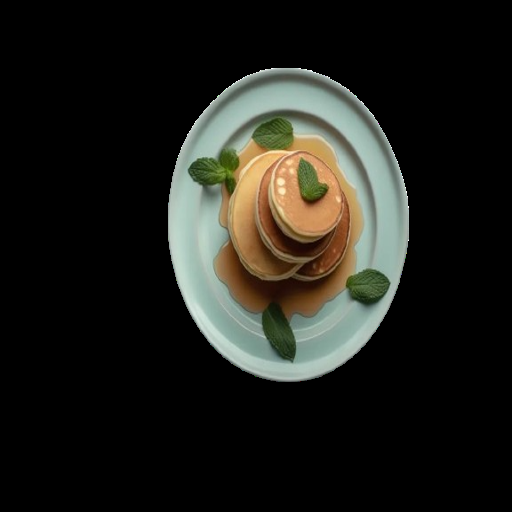

In [ ]:
# content 이미지 지정
from pathlib import Path
import os
file_path = '/content/drive/MyDrive/2조/hug/input_imgs/AI-seg/AI-34-seg.png'
file_path1 = Path(file_path)
file_name_without_ext = file_path1.stem
image = process_image(file_path)
image # 이미지 확인 (선택 사항)


In [ ]:
#같은 프롬프트로 10번 돌려서 /content/edited_images/작가명이 생성되고 거기에 저장됨
#프롬프트 지정
prompt = "Lenka, Change the background to a rustic, dark textured surface with subtle shadows to create depth and contrast"
num_inference_steps = 100
# image_guidance_scale = 1.5
# guidance_scale = 3
image_guidance_scale = 2
guidance_scale = 4
# edited_image = pipe(prompt,
#    image=image,
#    num_inference_steps=num_inference_steps,
#    image_guidance_scale=image_guidance_scale,
#    guidance_scale=guidance_scale,
#    generator=generator,
# ).images[0]
for i in range(10):
  edited_image = pipe(prompt,
   image=image,
   num_inference_steps=num_inference_steps,
   image_guidance_scale=image_guidance_scale,
   guidance_scale=guidance_scale,
   generator=generator,).images[0]
  #새로운 폴더 생성
  w_dir = f'/content/edited_images/{file_name_without_ext}'
  os.makedirs(w_dir, exist_ok = True)
  edited_image.save(f"{w_dir}/{file_name_without_ext}{i}.png")

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

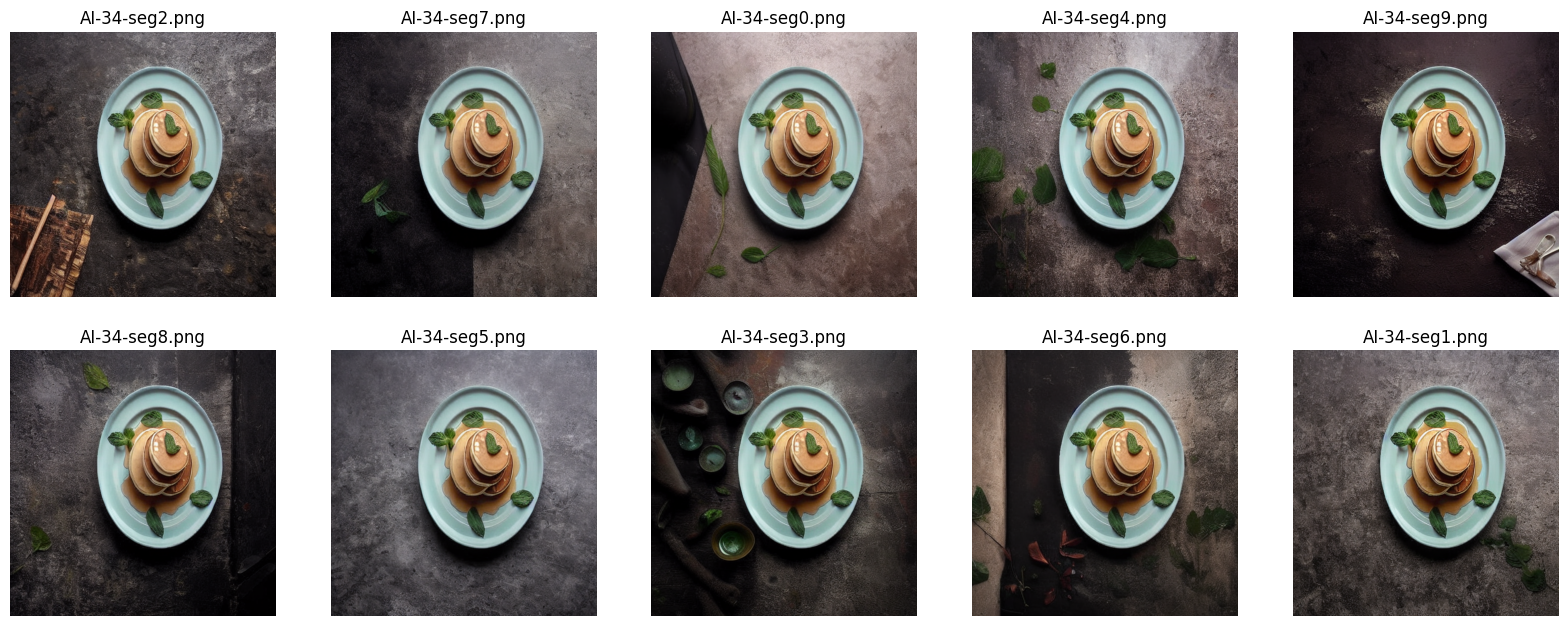

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Google Drive를 마운트합니다.


# 2. 이미지가 저장된 폴더 경로를 설정합니다.
folder_path = '/content/edited_images/AI-34-seg'  # 여기에 실제 이미지 폴더 경로를 입력하세요.

# 3. 폴더 내 모든 이미지 파일을 리스트로 가져옵니다.
image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png', 'gif'))]

# 4. 이미지 파일을 한 번에 모두 출력합니다.
plt.figure(figsize=(20, 20))
for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(img_path)
    plt.subplot(5, 5, i + 1)  # 5x5 그리드로 이미지 배치 (필요시 조정)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)

plt.show()